### Principal Component Analysis

## Reviews Preparation for Natural Language Processing

Add review_scores_rating from listings data to reviews data. Listings data only has review scores pertaining to the most recent review for a particular listing. This means that there will be many reviews that do not have a score, which we will remove during the merge.

In [1]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
#Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

#Ignore warnings
import warnings; warnings.simplefilter('ignore')

In [4]:
#Set path to listings and review data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

In [5]:
#Parse in listings dates
date = ['calendar_last_scraped', 'calendar_updated', 'first_review' ,'host_since', 'last_review']

#Read in Airbnb Listings Data
listings = pd.read_csv(path + '01_04_2020_Listings_Cleaned.csv',parse_dates=date, index_col=0, low_memory=True, sep=',')

#Read in Airbnb Calendar and Reviews data
reviews = pd.read_csv(path + '01_04_2020_Reviews_Cleaned.csv', sep = ',',
                       parse_dates=['date'], low_memory=True,index_col=0)

In [6]:
#Preview listings
listings.head()

,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,latitude,longitude,market,maximum_maximum_nights,name,neighborhood_overview,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,summary,transit,zipcode,weekly_price,monthly_price
0,3,TV Cable TV Internet Wifi Kitchen Pets liv...,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,2019-04-03,NaT,moderate,San Francisco,100.0,New update: the house next door is under const...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,True,1169,True,True,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,100.0,within an hour,2008-07-31,email phone facebook reviews kba,* No Pets - even visiting guests for a short t...,958,True,True,"{""SAN FRANCISCO""}",2019-03-16,37.76931,-122.43386,San Francisco,30.0,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,2.019040e+13,100.0,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117.0,1120.0,4200.0
1,5,Internet Wifi Kitchen Heating Family/kid fri...,0,0,1.0,Real Bed,2.0,3.0,1,0.0,0.0,2019-04-03,NaT,strict_14_with_grace_period,San Francisco,100.0,We live in a large Victorian house on a quiet ...,0.0,2009-05-03,2,Philip: English transplant to the Bay Area and...,True,8904,True,False,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,80.0,within a day,2009-03-02,email phone reviews kba work_ema...,"Please respect the house, the art work, the fu...",5858,False,True,"{""SAN FRANCISCO""}",2017-08-06,37.74511,-122.42102,San Francisco,60.0,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,111,0.0,235.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.92,Entire home/apt,2.019040e+13,NaN,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,94110.0,1600.0,5500.0
2,2,TV Internet Wifi Kitchen Free street parking...,30,365,4.0,Real Bed,1.0,1.0,9,9.0,0.0,2019-04-03,NaT,strict_14_with_grace_period,San Francisco,50.0,Nice and good public transportation. 7 minute...,12.0,2009-08-31,1,7 minutes walk to UCSF. 15 minutes walk to US...,True,21994,True,False,10.0,"San Francisco, California, United States",Aaron,Cole Valley,100.0,within a few hours,2009-06-17,email phone reviews jumio govern...,"No party, No smoking, not for any kinds of smo...",7918,False,True,"{""SAN FRANCISCO""}",2016-11-21,37.76669,-122.45250,San Francisco,60.0,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,17,0.0,65.0,Apartment,False,False,True,8.0,9.0,8.0,9.0,9.0,85.0,8.0,0.15,Private room,2.019040e+13,200.0,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,94117.0,485.0,1685.0
3,2,TV Internet Wifi Kitchen Free street parking...,30,365,4.0,Real Bed,1.0,1.0

In [7]:
#Check reviews data
reviews.dtypes

comments                 object
date             datetime64[ns]
id                        int64
listing_id                int64
reviewer_id               int64
reviewer_name            object
dtype: object

**Merge review_scores_rating from listings to corresponding reviews**

Ratings on airbnb
At airbnb hosts and guests are not reviewed in same. Where guests simply get a written review hosts also receives a star rating from 1 to 5 on 6 parameters:

Accuracy
Communication
Cleanliness
Location
Check In
Value
which are also calculated into one overall rating.

In [8]:
#Merge Review scores from listings to reviews dataframe. Merge on last review to confirm scores are assigned to proper review
review_scores = reviews.merge(listings.loc[:,['last_review','id','review_scores_rating']], left_on= ['listing_id', 'date'], 
                              right_on=['id', 'last_review'], suffixes=('_review', '_listings'))

#View review_scores shape
print('Data shape:', review_scores.shape)

#Check
review_scores.head(10)

Data shape: (68744, 9)


,comments,date,id_review,listing_id,reviewer_id,reviewer_name,last_review,id_listings,review_scores_rating
0,gracious hosts beautiful apartment out...,2018-11-12,348116418,1989997,55483280,Michael,2018-11-12,1989997,98.0
1,Ruths lovely apartment is conveniently locat...,2013-10-14,8060644,1657512,289650,Selena,2013-10-14,1657512,86.0
2,Great hosts Cool location Sparkling clean ...,2019-11-22,567541237,34181981,14454231,Kirk,2019-11-22,34181981,100.0
3,I booked the place for my friends who are a n...,2018-12-23,361512912,17237462,1254338,Shawn,2018-12-23,17237462,91.0
4,If youre staying for 12 days Maybe you can ha...,2019-04-06,433520140,13333814,102616701,Mohammad,2019-04-06,13333814,77.0
5,Katherine was quick with the responses There ...,2018-12-23,361565686,20149972,62560730,Julia,2018-12-23,20149972,100.0
6,The bathroom is nasty It smells really bad us...,2019-03-13,423315217,16071674,241155881,Christabel,2019-03-13,16071674,77.0
7,The location is amazing its in the heart of U...,2017-05-04,149503136,1483853,66959771,Mahalath,2017-05-04,1483853,95.0
8,The location is amazing its in the heart of U...,2017-05-04,149503136,1483853,66959771,Mahalath,2017-05-04,1483853,95.0
9,The location is amazing its in the heart of U...,2017-05-04,149503136,1483853,66959771,Mahalath,2017-05-04,1483853,95.0


### Quick clean up for NLP

In [9]:
#View missing values in review_scores
print('\nMissing values:\n', review_scores.isna().sum())


Missing values:
 comments                  0
date                      0
id_review                 0
listing_id                0
reviewer_id               0
reviewer_name             0
last_review               0
id_listings               0
review_scores_rating    469
dtype: int64


In [10]:
#Remove rows with missing review_scores_rating
review_scores = review_scores[-review_scores.review_scores_rating.isna()]

#Drop unnecessary columns from review_scores
review_scores.drop(columns=['last_review', 'id_listings'], axis = 1, inplace= True)

#Rename columns
review_scores.rename(columns={'review_scores_rating':'score'}, inplace=True)

#Drop duplicate values
review_scores.drop_duplicates(inplace=True)

In [11]:
#View updated reviews shape and missing values
print('Updated reviews data shape:',review_scores.shape)
print('Missing values: \n', review_scores.isna().sum())

Updated reviews data shape: (34923, 7)
Missing values: 
 comments         0
date             0
id_review        0
listing_id       0
reviewer_id      0
reviewer_name    0
score            0
dtype: int64


Stop Word Removal

In [12]:
#Check
review_scores.head()

,comments,date,id_review,listing_id,reviewer_id,reviewer_name,score
0,gracious hosts beautiful apartment out...,2018-11-12,348116418,1989997,55483280,Michael,98.0
1,Ruths lovely apartment is conveniently locat...,2013-10-14,8060644,1657512,289650,Selena,86.0
2,Great hosts Cool location Sparkling clean ...,2019-11-22,567541237,34181981,14454231,Kirk,100.0
3,I booked the place for my friends who are a n...,2018-12-23,361512912,17237462,1254338,Shawn,91.0
4,If youre staying for 12 days Maybe you can ha...,2019-04-06,433520140,13333814,102616701,Mohammad,77.0


Language Parsing

In [13]:
#Import stopwords
from nltk.corpus import stopwords

#check stopwords
stop =stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
#Exclude stopwords from comments
review_scores['comments_without_stopwords'] = review_scores['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Check
review_scores.head()

,comments,date,id_review,listing_id,reviewer_id,reviewer_name,score,comments_without_stopwords
0,gracious hosts beautiful apartment out...,2018-11-12,348116418,1989997,55483280,Michael,98.0,gracious hosts beautiful apartment outstanding...
1,Ruths lovely apartment is conveniently locat...,2013-10-14,8060644,1657512,289650,Selena,86.0,Ruths lovely apartment conveniently located Ca...
2,Great hosts Cool location Sparkling clean ...,2019-11-22,567541237,34181981,14454231,Kirk,100.0,Great hosts Cool location Sparkling clean Litt...
3,I booked the place for my friends who are a n...,2018-12-23,361512912,17237462,1254338,Shawn,91.0,I booked place friends newlywed couple They re...
4,If youre staying for 12 days Maybe you can ha...,2019-04-06,433520140,13333814,102616701,Mohammad,77.0,If youre staying 12 days Maybe handle room lon...


Visualize Review Scores

Text(0.5, 0, 'Scores')

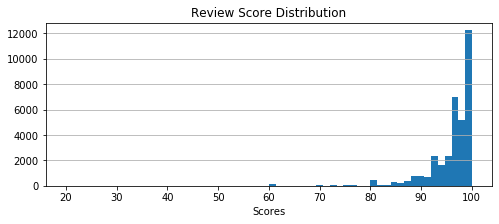

In [15]:
#View scores distribution
ax = review_scores.score.hist(bins = 60, figsize=(8,3), grid = False)

#Mute yaxis gridlines
ax.grid(axis='y')

#Set labels
ax.set_title('Review Score Distribution')
ax.set_xlabel('Scores')

Bin scores based on quartile

In [23]:
review_scores[review_scores.score < 50 ]

,comments,date,id_review,listing_id,reviewer_id,reviewer_name,score,comments_without_stopwords,score_labels
56364,This is not an apartment for a woman by hersel...,2017-02-22,133460039,14468427,3132993,Darren,40.0,This apartment woman The club noisy patrons dr...,Poor
56807,This person is dangerous the place is dangerou...,2018-11-13,348444876,29313385,64368280,Carolina,20.0,This person dangerous place dangerous Please d...,Poor
56888,This place is DREADFUL for the price 300 for a...,2019-08-19,513589132,33370910,6368869,Serena,40.0,This place DREADFUL price 300 room LOUD Hell a...,Poor
14418,Good location but serious problems with cleanness,2018-08-14,307611874,25189704,129745655,Abelino,40.0,Good location serious problems cleanness,Poor
14426,Good location but the place is still under con...,2019-06-29,478248189,34023324,109725743,Caitlin,40.0,Good location place still construction Showers...,Poor
14530,Good location ok unit,2019-07-30,499033549,22001836,82903164,Prateek,40.0,Good location ok unit,Poor
35673,Many of these reviews are right It is a bit mo...,2019-09-08,526308059,31043827,48928865,Evan,20.0,Many reviews right It bit crammed hostel hacke...,Poor
48002,The actual apartment is great but having to de...,2018-10-21,339698572,19424337,18281066,Terren,20.0,The actual apartment great deal Rebecca made t...,Poor
30538,Its just a hackerhouse basically a hostel Dont...,2019-07-31,499640681,35264180,157295873,Sean,40.0,Its hackerhouse basically hostel Dont expect much,Poor
47168,TLDR Its not worth your money The kitchen and ...,2019-02-03,408217632,29059418,56269558,Grace,40.0,TLDR Its worth money The kitchen bathrooms dis...,Poor


In [19]:
#Binning scores
review_scores.score.describe()

count    34923.000000
mean        95.974315
std          5.529684
min         20.000000
25%         95.000000
50%         97.000000
75%         99.000000
max        100.000000
Name: score, dtype: float64

In [16]:
#Create score_labels based on quartile review_scores is in
review_scores['score_labels'] = pd.qcut(review_scores['score'], q=4, labels=['Poor', 'Below Average','Above Average', 'Excellent'])

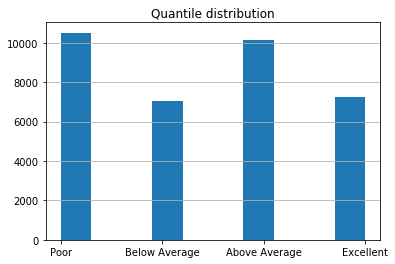

In [17]:
#Sort rows
review_scores.sort_values(by='score_labels',inplace=True)

#Plot
ax = review_scores.score_labels.hist()

#Set plot aesthetics
ax.set_title('Quantile distribution')
ax.grid(axis = 'x', which='major')

In [18]:
#Set path to write processed data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Write to csv
#review_scores.to_csv(path + '/01_08_2020_Reviews_Processed_Text_Analysis.csv',sep=',', index=False)